In [24]:
import numpy as np
import os
import pandas as pd
from config import *
import glob
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
#train = np.zeros((10000*10,51,153))
test = np.zeros((1000*10,51,153))

#train_targ = np.zeros((10000*10))
test_targ = np.zeros((1000*10))

#train_ID = np.zeros((10000*10))
test_ID = np.zeros((1000*10))

#init_len_tr = 0
init_len_te = 0
for ii in range(10):
    test_full= np.load('../data/data_split/test%d'%ii+'.npy') 
     
    test_targ_full= np.load('../data/data_split/test_targ_%d'%ii+'.npy')
    
    test_ID_full= np.load('../data/data_split/test_ID_%d'%ii+'.npy') 
    
    np.random.seed(3)
    random_index_test = np.random.choice(len(test_full), size=1000, replace=False)

    
    tests = test_full[random_index_test,:,:]
    test[init_len_te:init_len_te+len(random_index_test)] = tests
    
    tests_targ = test_targ_full[random_index_test]
    test_targ[init_len_te:init_len_te+len(random_index_test)] = tests_targ
    
    tests_id = test_ID_full[random_index_test]
    test_ID[init_len_te:init_len_te+len(random_index_test)] = tests_id
    
    init_len_te = init_len_te + len(random_index_test)
    

    test_full = None
    test_targ_full = None
    test_ID_full = None
    tests = None
    tests_id = None
    
    print("Done with {}".format(ii)) 

Done with 0
Done with 1
Done with 2
Done with 3
Done with 4
Done with 5
Done with 6
Done with 7
Done with 8
Done with 9


In [5]:
test.shape

(10000, 51, 153)

In [26]:
stdsd = test[:,:,:52].std(axis=(1,2))
meansd = test[:,:,:52].mean(axis=(1,2))
minsd = test[:,:,:52].min(axis=(1,2))
maxsd = test[:,:,:52].max(axis=(1,2))

stdss = test[:,:,51:103].std(axis=(1,2))
meanss = test[:,:,51:103].mean(axis=(1,2))
minss = test[:,:,51:103].min(axis=(1,2))
maxss = test[:,:,51:103].max(axis=(1,2))

stdst = test[:,:,102:153].std(axis=(1,2))
meanst = test[:,:,102:153].mean(axis=(1,2))
minst = test[:,:,102:153].min(axis=(1,2))
maxst = test[:,:,102:153].max(axis=(1,2))

In [74]:
test_ID = test_ID.astype(int)
test_targ = test_targ.astype(int)

In [75]:
ss_test = pd.DataFrame({"ID":test_ID, "TYPE":test_targ,
              "min_diff":minsd,"min_srch":minss,"min_temp":minst,
              "max_diff":maxsd,"max_srch":maxss,"max_temp":maxst,
              "std_diff":stdsd,"std_srch":stdss,"std_temp":stdst,
              "mean_diff":meansd,"mean_srch":meanss,"mean_temp":meanst})
ss_test

,ID,TYPE,min_diff,min_srch,min_temp,max_diff,max_srch,max_temp,std_diff,std_srch,std_temp,mean_diff,mean_srch,mean_temp
0,11356276,1,-3.720870,0.0,0.0,4.545385,1.191450,1.027486,0.990697,0.140391,0.120174,0.003696,0.262593,0.095115
1,9412560,1,-3.695898,0.0,0.0,3.227809,0.640602,1.001167,0.990346,0.105567,0.067880,0.000552,0.073643,0.011361
2,8540062,1,-3.591272,0.0,0.0,7.316392,1.077196,1.033288,0.990404,0.053680,0.059159,0.001543,0.081465,0.040908
3,10149330,0,-3.554302,0.0,0.0,3.323105,1.668767,1.316897,0.994892,0.205547,0.099999,0.012818,0.676597,0.327829
4,7789880,1,-5.846945,0.0,0.0,5.862575,1.008189,1.001565,0.990339,0.078007,0.057323,0.000157,0.023272,0.009020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9476886,0,-7.464615,0.0,0.0,4.240749,1.056569,1.028401,0.990382,0.130472,0.116877,0.001244,0.100951,0.063365
9996,11279388,0,-3.180520,0.0,0.0,4.153554,0.980322,1.549587,0.990356,0.074751,0.178464,0.000819,0.050589,0.563309
9997,7921827,1,-7.047901,0.0,0.0,3.745021,1.032382,1.013402,0.990362,0.094559,0.097557,0.000857,0.063188,0.045139
9998,10085008,0,-3.494092,0.0,0.0,16.477507,1.095464,1.152418,0.990417,0.066541,0.125737,0.001709,0.110116,0.190021


In [76]:
ss_test["min_diff"].min(),ss_test["min_diff"].max()

(-29.32943889718078, -0.13100027929765096)

In [77]:
ss_test["max_diff"].min(),ss_test["max_diff"].max()

(0.7550389404197264, 42.13604378481264)

In [82]:
ss_test["std_diff"].min(),ss_test["std_diff"].max()

(0.9903379376602871, 2.8112896829592655)

In [83]:
ss_test["mean_diff"].min(),ss_test["mean_diff"].max()

(6.0283603147067325e-18, 0.36841345186359314)

In [78]:
ss_test["min_srch"].min(),ss_test["min_srch"].max()

(0.0, 0.0)

In [79]:
ss_test["max_srch"].min(),ss_test["max_srch"].max()

(0.05131203485404407, 20.13851255474805)

In [ ]:
(y-ymin) / ymax

(y-ymin) / (ymax-ymin)

In [84]:
ss_test["min_temp"].min(),ss_test["min_temp"].max()

(0.0, 0.0)

In [85]:
ss_test["max_temp"].min(),ss_test["max_temp"].max()

(0.9475437695356201, 26.963457402589402)

In [81]:
ss_test[ss_test["max_srch"] == ss_test["max_srch"].max()]

,ID,TYPE,min_diff,min_srch,min_temp,max_diff,max_srch,max_temp,std_diff,std_srch,std_temp,mean_diff,mean_srch,mean_temp
2437,10045887,1,-3.967538,0.0,0.0,19.49921,20.138513,6.263555,2.81129,2.468413,0.840643,0.368413,18.736561,5.113385


In [86]:
ss_test[ss_test["max_temp"] == ss_test["max_temp"].max()]

,ID,TYPE,min_diff,min_srch,min_temp,max_diff,max_srch,max_temp,std_diff,std_srch,std_temp,mean_diff,mean_srch,mean_temp
7322,8451852,1,-1.927139,0.0,0.0,8.553924,0.623275,26.963457,0.991204,0.079403,7.508307,0.005789,0.078108,23.485922


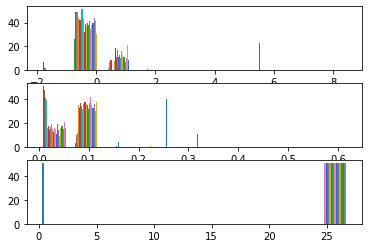

In [87]:
fig, ax = plt.subplots(3,1)
ax[0].hist(test[7322][:,:52])
ax[1].hist(test[7322][:,51:103])
ax[2].hist(test[7322][:,102:153])
plt.show()

In [25]:
import imageio as iio

In [26]:
plt.rcParams['axes.grid'] = False

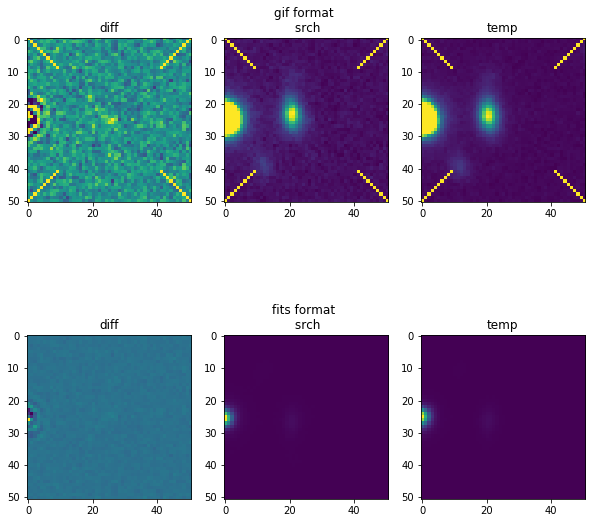

In [42]:
imfd = fits.open(('../data/stamps6/SNWG/Archive/2013/Y1/20131209/488183092/diff10335273.fits'))[0].data
imfs = fits.open(('../data/stamps6/SNWG/Archive/2013/Y1/20131209/488183092/srch10335273.fits'))[0].data
imft = fits.open(('../data/stamps6/SNWG/Archive/2013/Y1/20131209/488183092/temp10335273.fits'))[0].data
imgd = iio.imread('../data/stamps6/SNWG/Archive/2013/Y1/20131209/488183092/diff10335273.gif')
imgs = iio.imread('../data/stamps6/SNWG/Archive/2013/Y1/20131209/488183092/srch10335273.gif')
imgt = iio.imread('../data/stamps6/SNWG/Archive/2013/Y1/20131209/488183092/temp10335273.gif')

fig, ax = plt.subplots(2,3,figsize=(10,10))
ax[0,0].set_title("diff")
ax[0,0].imshow(imgd)
ax[0,1].set_title("gif format \n srch")
ax[0,1].imshow(imgs)
ax[0,2].set_title("temp")
ax[0,2].imshow(imgt)

ax[1,0].set_title("diff")
ax[1,0].imshow(imfd)
ax[1,1].set_title("fits format \n srch")
ax[1,1].imshow(imfs)
ax[1,2].set_title("temp")
ax[1,2].imshow(imft)

#plt.savefig("10335273.pdf",bbox_inches="tight")

In [2]:
train_full= np.load('../data/data_split_n/train0.npy')

In [11]:
for ii in range(8,9):
    train_full= np.load('../data/data_split/train%d'%ii+'.npy') 
    test_full= np.load('../data/data_split/test%d'%ii+'.npy') 
    
    train_targ_full= np.load('../data/data_split/train_targ_%d'%ii+'.npy') 
    test_targ_full= np.load('../data/data_split/test_targ_%d'%ii+'.npy')
    
    train_ID_full= np.load('../data/data_split/train_ID_%d'%ii+'.npy') 
    test_ID_full= np.load('../data/data_split/test_ID_%d'%ii+'.npy') 

In [17]:
pd.DataFrame({"ID":train_ID_full, "TY":train_targ_full})[-100:]

,ID,TY
66905,11864663,0
66906,11864693,0
66907,11864898,1
66908,11864906,1
66909,11865164,0
...,...,...
67000,11873612,1
67001,11873889,0
67002,11874008,0
67003,11874042,0


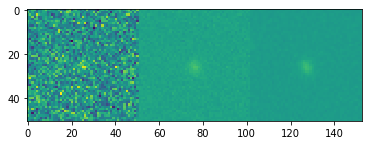

In [16]:
plt.imshow(train_full[66995])

In [54]:
test_targ_full= np.load('../data/data_split/test_targ_8.npy')
test_ID_full= np.load('../data/data_split/test_ID_8.npy')
train_targ_full= np.load('../data/data_split/train_targ_8.npy')
train_ID_full= np.load('../data/data_split/train_ID_8.npy')

test_targ_full_n= np.load('../data/data_split_n/test_targ_8.npy')
test_ID_full_n= np.load('../data/data_split_n/test_ID_8.npy')
train_targ_full_n= np.load('../data/data_split_n/train_targ_8.npy')
train_ID_full_n= np.load('../data/data_split_n/train_ID_8.npy')



In [16]:
total_targ = np.concatenate((test_targ_full,train_targ_full))
total_targ_n = np.concatenate((test_targ_full_n,train_targ_full_n))

total_ID = np.concatenate((test_ID_full,train_ID_full))
total_ID_n = np.concatenate((test_ID_full_n,train_ID_full_n))

In [17]:
df = pd.DataFrame({"ID":total_ID, "TY":total_targ}).sort_values(by= ["ID"]).reset_index(drop=True)

In [18]:
df_n = pd.DataFrame({"ID":total_ID_n, "TY":total_targ_n}).sort_values(by= ["ID"]).reset_index(drop=True)


In [21]:
df == df_n

,ID,TY
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
89335,True,True
89336,True,True
89337,True,True
89338,True,True


In [20]:
df_n

,ID,TY
0,6961317,0
1,6961344,1
2,6961438,1
3,6961442,0
4,6961447,1
...,...,...
89335,11874126,0
89336,11874202,0
89337,11874269,1
89338,11874536,0


In [63]:
testfulln= np.load('../data/data_split_n/test8.npy')
testfull= np.load('../data/data_split/test8.npy')


In [64]:
testfull.max()

39.4050448240596

In [65]:
testfulln.max()

75024.56052398682